In [ ]:
import numpy as np
from scipy import linalg  # Invoke with linalg
import scipy.linalg       # invoke with scipy.linalg
import matplotlib.pyplot as plt

## **Table of Content**
* What we had been solving
* numpy array slicing, shaping and more computations. 
* Solving Linear systems efficiently.
* Theories of the topics we covered. 


What is $Ax = b$
$$
\begin{aligned}
    Ax &= b
    \\
    \begin{bmatrix}
        a_{1,1}&  a_{1, 2} \\ a_{2, 1}&  a_{2,2}
    \end{bmatrix}\begin{bmatrix}
        x_1\\ x_2
    \end{bmatrix} &= 
    \begin{bmatrix}
        b_{1} \\ b_{2}
    \end{bmatrix}
\end{aligned}
$$

Using Matrix vector operation we have: 

$$
\begin{bmatrix}
    a_{1,1}x_{1} + a_{1, 2}x_2 
    \\
    a_{2, 1}x_{1} + a_{2,2}x_2
\end{bmatrix} = 
\begin{bmatrix}
    b_{1} \\ b_{2}
\end{bmatrix}
$$



### **Matrix Matrix Multiplications operator @**

* `A@B` is a binary operator on A, B where A, B are both 2d array (matrices). It's equivalent to invoking `A.matnul(B)`. 

Mathematically, assuming $A$ is $n\times m$ and $B$ is $m\times k$

$$
(AB)_{i, j} = \sum_{k = 1}^{m} A_{i, k}B_{k, j}
$$

The $i, j$ th element of the product matrix $AB$ is the sum over the elementwise product on the $i$ th row of $A$ and $j$ th column of b. Notice that this means the operations is only possible if the number of columns of the first matrix matches the number of rows of the second matrix. 

Numpy Documentations [here](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)

**Note**

The `@` operator is fine as long as you know for sure the left and right are both 2d arrays. 

**WARNING**

`np.matrix` object is deprecated and don't use it, they also have different bahavior under `*` operator. 
`*` THIS IS NOT MATRIX MATRIX PRODUCT, it's the [Hadamard Product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))

In [ ]:
m, n, k = 3, 5, 7  # m, n, k can be equal to 1, and that would be the same matrix vector product 
A = np.random.randint(10, size=(n, m))  # just random matrices with entries between 0 and 9. 
B = np.random.randint(10, size=(m, k))
print(A@B)

[[102  95  56  53  83  18 109]
 [111  98  67  48  87  27 115]
 [ 77  77  78  27  79  20 105]
 [ 76  69  35  41  58  13  76]
 [115 113  59  69  98  13 128]]


### **Np.dot**

The following is copied straight from offcial numpy doc: [here](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

> numpy.dot
> 
> numpy.dot(a, b, out=None)
> 
> Dot product of two arrays. Specifically,
> 
> * **If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation)**.  <--- You are working with this for this class
> 
> * **If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred**.  <--- You are working with this for this class
> 
> * If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.
> 
> * If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.
> 
> * If a is an N-D array and b is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b:

This function is pretty general. It's meant for a special type of tensor product. But it reduces to usual product in linear alegbra when we have matrices and vector. 

**Demonstration:** 

In [ ]:
print("Matrix Matrix product")
print(np.dot(A, B))
v = np.random.randint(10, size=(A.shape[1]))  # 1d vector , where A.shape[1]  is giving me the length of the first axis of the tensor A (The number of columns of A) 
print("Matrix with 1d vector ")
print(np.dot(A, v))

Matrix Matrix product
[[102  95  56  53  83  18 109]
 [111  98  67  48  87  27 115]
 [ 77  77  78  27  79  20 105]
 [ 76  69  35  41  58  13  76]
 [115 113  59  69  98  13 128]]
Matrix with 1d vector 
[67 90 70 48 59]


### **Indexing Example**

Minor of a matrix. Given any matrix the minor of A associated at $A_{i,j}$ is the sub matrix removing the i row and jth column of that matrix. This is just an example you don't need to know too much mathematical details about this entity. 

The key here is that `[a:b]` is a notation for indexing from `a` including `a` to `b - 1`. 

`[a:]` is the special case where we want to go to the very end with of the array. 

`[:a]` start at zero and goes to `a -1` 

**Warning:** 

> Don't use `[a][b]` for indexing in numpy, it changes the type and the shape of the object, only use it when you are really pro at it and know what you are doing!!! 


In [ ]:
A = np.random.rand(3,3)
print(A)
AMinor0_0 = A[1:, 1:]  # starting the row and column without the first, indexed by zero. 
print(AMinor0_0)
AMinor2_2 = A[:-1, :-1]  # excluding the last rows and column. 
print(AMinor2_2)

[[0.78445439 0.09843807 0.38758877]
 [0.78725816 0.3592917  0.03532636]
 [0.43400881 0.90780951 0.13121422]]
[[0.3592917  0.03532636]
 [0.90780951 0.13121422]]
[[0.78445439 0.09843807]
 [0.78725816 0.3592917 ]]


### **Solving Linear System With LU**

LU decomposition is the star of this class. At least for now. Here is how it works in python: 

$$
\begin{aligned}
    A &= PLU  & \text{ The decomposition}
    \\
    Ax&= b & \text{The equation}
    \\
    Ax &= PLUx  & \text{Substitute decomposition}
    \\
    PLUx &= b  & \text{Connect it to RHS}
    \\
    x & = U^{-1}L^{-1}P^Tb & \text{Using Linear algebra}
\end{aligned}
$$

Ok, not all of us know what that linear algebra math is, let me explain: 

* Use the `scipy.linalg.lu(A)` to get P, L, U matrices
* Use `scipy.linalg.solve_triangular(L, P.T@b, lower=True)` to get results and store it to vector `y`
* Use `scipy.linalge.solve_triagular(U, y)` to get results and store it to vector `x`, this is the solution to the system. 

Note: The professor made the mistake during class of using `numpy.linalge.solve`, which won't use a smart back substitution on triangular matrices. 

Scipy lu doc [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html)
Scipy triangular solve doc [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)

**Warning:** 

don't use `inv` in the class (and outside of the class in the industry, your job, your home or whatever), if you want Gaussian Elimination, use `np.solve`. 

**Hold on a sec!** 

If we have the inverse, then it's the same computational complexity compare to solving with LU, why are we using LU? 

The reason behind it is that, inverse computations are not numerically stable, and this is a big problem when the matrix gets too big. If you are not convince, check out the section about numerical stability, and two of the matrices that is troublesome and usually used as a benchmark are the: Vandermond Matrices on Linear Spaced Vectors, and the [Hilbert Matrix](https://en.wikipedia.org/wiki/Hilbert_matrix). 


In [ ]:
A = np.random.rand(3,3)
b = np.random.rand(3, 1)
P, L, U = linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[ 1.          0.          0.        ]
 [ 0.82919537  1.          0.        ]
 [ 0.06931661 -0.90221735  1.        ]]
[[ 0.34542858  0.94783716  0.60189629]
 [ 0.         -0.01800188 -0.21206834]
 [ 0.          0.          0.44380477]]


In [ ]:
y = linalg.solve_triangular(L, P.T@b, lower=True)
x = linalg.solve_triangular(U, y)
print(A@x)
print(b)

[[0.88028506]
 [0.06934648]
 [0.56431453]]
[[0.88028506]
 [0.06934648]
 [0.56431453]]


### **Using a basic Function**

We can write a function to do this. This is for the sake of abstracting out the code and make things more modular. It doesn't provide speed up. But it reduces pain of debugging and without modular construction of code, abstractions and various other techniques and development method in software engineering, the CSE department will just be the Math department. 


In [ ]:
def LUSolve(P, L, U, b): # A function with parameters: P, L, U, b
    y = linalg.solve_triangular(L, P.T@b, lower=True)
    x = linalg.solve_triangular(U, y)
    return x # <-- Must return, or else your function returns NONE. 


### **Efficent Solving** 

It's up to the task of HW2 for you to figure out to solve on many different vectors repeatedly. 

The hint is, whenever using the LU decomposition, only decompose the matrix once, and bring the `L,U, P` matrix with you to solve more problems. 

### **What if the System can't be solved?**

* The LU decomposition routine will not give error, but the solving of triangular matrices will give errors. 

In [ ]:
A = np.diag([1, 1, 0])
b = np.random.rand(3, 1)
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)  # This matrix is not invertible. 
x = LUSolve(P, L, U, b)  # will notify you with an error. 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


LinAlgError: singular matrix: resolution failed at diagonal 2

### **Numerical Errors**

The problem with numerical instability is huge. Any algorithm that is ill conditions will not work at all, and will be disasterous when deployed to mission critical tasks. I have a more aggressive example that can demonsrate this, and the code will be helpful for you to learn new ways of coding in python. 

Consider this polynomial: 

$$
(1 + x)^n = \sum_{j = 0}^{n} \begin{pmatrix}
    n \\j
\end{pmatrix}x^{j}
$$

If you sum it up, it will ruin floating point arithmetic in a very dramatic way. 

let's try using `n = 80` and both way to sum this up. 

In [ ]:
import scipy.special 

def EvalLHS(x, deg):
    """
        Uses binomial coefficient to sum up powers array of 1, x, x^2, x^3 ... x^deg
    """
    BiCoeff = [scipy.special.binom(deg, N) for N in range(deg + 1)]
    XPow = (x*np.ones(deg + 1))**np.arange(deg + 1)
    return np.sum(XPow*BiCoeff)

x = -0.9
deg = 50  # Increase the degree here.
print(EvalLHS(x, deg))
print((1 + x)**deg)

-0.008361779252259297
9.999999999999889e-51


### **Programming Examples** 

**Harmonic Sum**: 

$$
\sum_{k = 1}^{N}\frac{1}{k} \approx \int_{1}^{N} \frac{dx}{x} = \ln(N)
$$

In fact $\int_{1}^{\infty} \frac{dx}{x} - \sum_{k = 1}^{N} \frac{1}{k} = -\text{The Euler Constant}$ 

0.5787160819017894


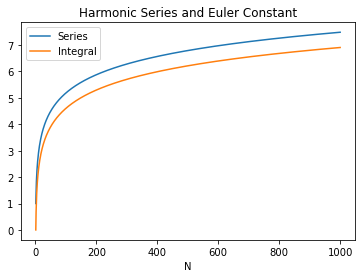

In [ ]:
def HarmonicSum(N):  # it's a function with input N. 
    AllTheSums = np.zeros(N)
    AccumulatingSum = 0
    for IdxI in range(N):
        AccumulatingSum += 1/(IdxI + 1)    # AccumulatingSum = AccumulatingSum + 1/(IdxI + 1)
        AllTheSums[IdxI] = AccumulatingSum
    return AllTheSums

N = 1000
Xaxis = np.arange(N) + 1
plt.plot(Xaxis, HarmonicSum(N))
plt.plot(Xaxis, np.log(Xaxis))
plt.title("Harmonic Series and Euler Constant")
plt.xlabel("N")
plt.legend(["Series", "Integral"])
print(HarmonicSum(N)[-1] - np.log(N - 1))

# Do live demo if it's possible for this one. 


### **HW1 Logistic Regression**

The formula is: 

$$
x_{n + 1} = rx_n(1 - x_n)
$$

And we wish to iterate 50 times on this expression, for `r = 0.8,1.5,2.8,3.2,3.5,3.65`


Probably no live demonstration this part because everyone has done it in their HW1. 



In [ ]:
RValues = [0.8,1.5,2.8,3.2,3.5,3.65]
X = np.zeros((50, len(RValues)))  # len(::np.array): Gives the number of rows of the array. (If 1d, then it's just the total numbher of elements in the array.  )
X[0, :] = 0.5  # The initial conditions for all of the values. 
for IdxI, r in enumerate(RValues): # Iterating through both the indices and the values of the array RValues
    for IdxJ in range(1, 50): 
        X[IdxJ, IdxI] = r*X[IdxJ - 1, IdxI]*(1 - X[IdxJ - 1, IdxI])

print(X[-10:]) ## print out the last ten rows. 



[[1.57955770e-05 3.33333333e-01 6.42847701e-01 5.13044510e-01
  5.00884210e-01 5.36104004e-01]
 [1.26362620e-05 3.33333333e-01 6.42864696e-01 7.99455490e-01
  8.74997264e-01 9.07742228e-01]
 [1.01088819e-05 3.33333333e-01 6.42851100e-01 5.13044510e-01
  3.82819683e-01 3.05673905e-01]
 [8.08702375e-06 3.33333333e-01 6.42861977e-01 7.99455490e-01
  8.26940707e-01 7.74666396e-01]
 [6.46956668e-06 3.33333333e-01 6.42853275e-01 5.13044510e-01
  5.00884210e-01 6.37138054e-01]
 [5.17561986e-06 3.33333333e-01 6.42860237e-01 7.99455490e-01
  8.74997264e-01 8.43855013e-01]
 [4.14047446e-06 3.33333333e-01 6.42854668e-01 5.13044510e-01
  3.82819683e-01 4.80937616e-01]
 [3.31236585e-06 3.33333333e-01 6.42859123e-01 7.99455490e-01
  8.26940707e-01 9.11173683e-01]
 [2.64988390e-06 3.33333333e-01 6.42855559e-01 5.13044510e-01
  5.00884210e-01 2.95417138e-01]
 [2.11990151e-06 3.33333333e-01 6.42858410e-01 7.99455490e-01
  8.74997264e-01 7.59732363e-01]]


### **Solving Linear System with Simple Iterations**

**The Jacobi Iterations Matrix Form**: 

$$
x_{n + 1} = D^{-1}(b - Rx_{n})
$$

For solving the system $Ax = b$ where $R + D = A$, where $D$ is the diagonal parts of the matrix $A$, and the matrix $R$ is all the remaning parts of the Matrix $A$. 

This method converges when: 

The absolute value of the diaognal is strictly larger than the sum of the absolute values of the non-diagonal elements, for each row/column. This is a necessary conditions. 

This neccessary condition is call the "Matrix is Strictly Diagonal Dominance". 

**The Gauss Seidel Iteration Matrix Form**

$$
x_{n + 1} = L^{-1}(U - Rx_{n})
$$

Where this time $A = L + U$, the $L$ is a lower triangular part of matrix $A$ that include the diagonal, and the matrix $U$ is the upper triangular part of matrix $A$ not including the diaognal part. 

**Note**: When solving with the matrix $L$, please use the `scipy.linalg.solve_triangular()` function. 

**AHHHH**

WHy Matrix Form???? I didn't take Linear Algebra yet! 



WOOOAh, Matrix vector multiplication equation is simultaneous equations! Solvinf the matrix vector equation $Ax = b$, we get back the vector $x$, which is just the solution to the simultaneous linear equation above, but packed into a vector. 

In [ ]:
N = 10
A = np.random.randn(N,N) + np.eye(N)*10  # Diagonally Dominance Matrix
b = np.random.randn(N, 1)
d = np.diag(A)
D = np.diag(d)
R = A - D
x0 = np.zeros((N, 1))
x = x0
for _ in range(50):
    xpre = x
    x = d**(-1) *(b - R @ x)  # Operator Broadcasting here, demo in scratch paper if possible. 
    print(np.sum(np.abs(x) - np.abs(xpre)))  # np.sum, np.abs methods, this is difference between this iteration and previous iteration. 
    

9.800950803607714
1.051210749501169
0.12438672020628205
-0.05511882329259895
-0.011126147219893953
-0.007677159913239254
0.00034949197303781217
3.646947655066603e-05
0.00017312658280558071
1.8237171170432803e-05
6.894099903446971e-06
-2.0469544167733833e-06
-4.1332385729807297e-07
-2.6132216850160983e-07
-2.323840215742723e-09
-1.2710207886179603e-11
5.5620585862753424e-09
7.500154716039154e-10
2.801722274320406e-10
-6.108204740618017e-11
-1.4814227969339733e-11
-1.0094725402809424e-11
-4.2407743983119417e-13
-6.346138892165953e-14
2.0335642891833317e-13
3.3209546224099995e-14
1.260970494687541e-14
-1.97758476261356e-15
-4.926614671774132e-16
-3.7816971776294395e-16
-7.979727989493313e-17
-1.3530843112619095e-16
3.469446951953614e-17
-6.938893903907228e-18
-1.3877787807814457e-17
-2.7755575615628914e-17
2.7755575615628914e-17
-2.7755575615628914e-17
2.7755575615628914e-17
-2.7755575615628914e-17
2.7755575615628914e-17
-2.7755575615628914e-17
2.7755575615628914e-17
-2.7755575615628914e-

**Pything Cheat Sheet**

Python Cheat sheet [here](https://www.pythoncheatsheet.org)

Python numpy cheat sheet [here](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet)
